# **1) Chargement et aperçu initial du jeu de données**


In [ ]:
import pandas as pd
df = pd.read_csv("fr-en-baccalaureat-par-academie.csv", sep=';')
df = df.fillna(0)
df.columns = df.columns.str.strip()
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34371 entries, 0 to 34370
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   num_ligne                                                      34371 non-null  float64
 1   Session                                                        34371 non-null  int64  
 2   Code académie                                                  34371 non-null  int64  
 3   Académie                                                       34371 non-null  object 
 4   Sexe                                                           34371 non-null  object 
 5   Statut du candidat                                             34371 non-null  object 
 6   Voie                                                           34371 non-null  object 
 7   Série                                                     

,num_ligne,Session,Code académie,Académie,Sexe,Statut du candidat,Voie,Série,Diplôme spécialité,Nombre d'inscrits,...,"Nombre d'ajournés, passant les épreuves du 2nd groupe",Nombre d'admis à l'issue du 2nd groupe,Nombre de refusés à l'issue du 2nd groupe,Nombre d'admis totaux,Nombre d'admis avec mention TB avec les félicitations du jury,Nombre d'admis avec mention TB sans les félicitations du jury,Nombre d'admis avec mention B,Nombre d'admis avec mention AB,Nombre d'admis sans mention,Nombre de refusés totaux
0,1.0,2021,2,AIX-MARSEILLE,FEMININ,APPRENTISSAGE,BAC PROFESSIONNEL,BAC PRO PROD,BAC PRO 22106 CUISINE,13,...,1,0,1,8,0,0,2,3,3,4
1,2.0,2021,2,AIX-MARSEILLE,FEMININ,APPRENTISSAGE,BAC PROFESSIONNEL,BAC PRO PROD,BAC PRO 23102 TRAVAUX PUBLICS,1,...,0,0,0,1,0,0,0,1,0,0
2,5.0,2021,2,AIX-MARSEILLE,FEMININ,APPRENTISSAGE,BAC PROFESSIONNEL,BAC PRO PROD,BAC PRO 25303 AERONAUTIQUE OPTION SYSTEMES,3,...,0,0,0,3,0,0,0,3,0,0
3,6.0,2021,2,AIX-MARSEILLE,FEMININ,APPRENTISSAGE,BAC PROFESSIONNEL,BAC PRO PROD,BAC PRO 25510 METIERS ELECT. ENVIRON. CONNECTES,2,...,0,0,0,2,0,0,1,1,0,0
4,8.0,2021,2,AIX-MARSEILLE,FEMININ,APPRENTISSAGE,BAC PROFESSIONNEL,BAC PRO PROD,BAC PRO AG 21114 CONDUITE PRODUCTIONS HORTICOLES,1,...,0,0,0,1,0,0,0,0,1,0


# **2) Création des indicateurs (taux de réussite et taux de mentions TB)**

In [ ]:
df["TauxReussite"] = df["Nombre d'admis totaux"] / df["Nombre de présents"]
df["TauxMentionTB"] = (
 (df["Nombre d'admis avec mention TB avec les félicitations du jury"] +
 df["Nombre d'admis avec mention TB sans les félicitations du jury"]) /
 df["Nombre d'admis totaux"]
)


# **3) Filtrage des lignes incohérentes (présents et admis non nuls)**

In [ ]:
df = df[(df["Nombre de présents"] > 0) & (df["Nombre d'admis totaux"] > 0)]

# **4) Analyse exploratoire : répartitions par groupes**

a) Exploration du classement des académies avec le plus grand nombre d'inscrit

In [ ]:
df.groupby('Académie')["Nombre d'inscrits"].sum().sort_values(ascending=False)

,Nombre d'inscrits
Académie,
VERSAILLES,281616
CRETEIL,215666
LILLE,185012
NANTES,171224
RENNES,151799
GRENOBLE,151442
LYON,149433
NORMANDIE,143010
BORDEAUX,142617


b) Classement des voies par nombre d'étudiants

In [ ]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv("fr-en-baccalaureat-par-academie.csv", sep=";")
df = df.fillna(0)
df.columns = df.columns.str.strip()

# Nettoyage de la colonne 'Voie'
df["Voie"] = df["Voie"].astype(str).str.strip().str.upper()

# Groupement par voie et somme des inscrits
inscrits_par_voie = df.groupby("Voie")["Nombre d'inscrits"].sum().sort_values(ascending=False)

# Affichage du résultat
print("Nombre total d'étudiants inscrits par voie :")
print(inscrits_par_voie)


Nombre total d'étudiants inscrits par voie :
Voie
BAC GENERAL          1544276
BAC PROFESSIONNEL     839607
BAC TECHNOLOGIQUE     598439
Name: Nombre d'inscrits, dtype: int64


c) Groupement des candidats masculins et féminins

In [ ]:
import pandas as pd

# Exemple : chargement du fichier
df = pd.read_csv("fr-en-baccalaureat-par-academie.csv", sep=";")
df = df.fillna(0)
df.columns = df.columns.str.strip()

# Normalisation de la colonne 'Sexe'
df["Sexe"] = df["Sexe"].str.strip().str.upper()

# Regrouper les formes équivalentes
df["Sexe"] = df["Sexe"].replace({
    "GARÇONS": "MASCULIN",
    "GARCONS": "MASCULIN",
    "GARCON": "MASCULIN",
    "MASCULINS": "MASCULIN",
    "MASCULIN": "MASCULIN",
    "HOMME": "MASCULIN",

    "FILLES": "FEMININ",
    "FILLE": "FEMININ",
    "FÉMININ": "FEMININ",
    "FEMININS": "FEMININ",
    "FEMININE": "FEMININ",
    "FEMME": "FEMININ"
})

# Vérification des nouvelles valeurs
print(df["Sexe"].value_counts())

# Total des présents par sexe
df.groupby("Sexe")["Nombre de présents"].sum()


Sexe
MASCULIN    19317
FEMININ     15054
Name: count, dtype: int64


,Nombre de présents
Sexe,
FEMININ,1495643
MASCULIN,1469727


# **5) Visualisations**

**a) Top 5 académies - Taux moyen de mentions Très Bien (2021-2024)**

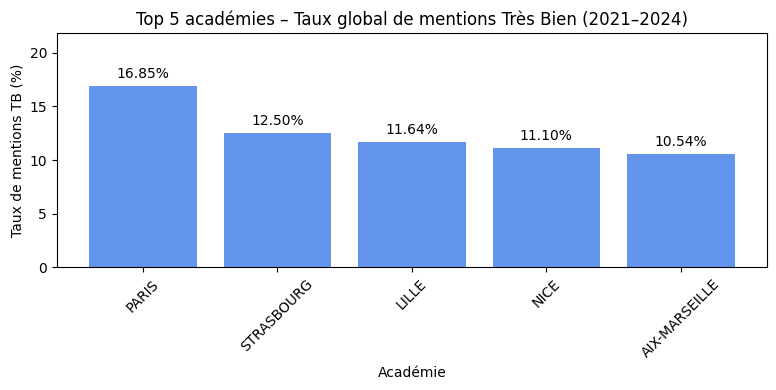

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chargement du fichier CSV
df = pd.read_csv("fr-en-baccalaureat-par-academie.csv", sep=";")
df = df.fillna(0)
df.columns = df.columns.str.strip()

# 2. Filtrage des années 2021 à 2024
df = df[(df["Session"] >= 2021) & (df["Session"] <= 2024)]

# 3. Nettoyage de la colonne 'Académie'
df["Académie"] = df["Académie"].astype(str).str.strip().str.upper()

# 4. Création d'une colonne "MentionsTB"
df["MentionsTB"] = (
    df["Nombre d'admis avec mention TB avec les félicitations du jury"] +
    df["Nombre d'admis avec mention TB sans les félicitations du jury"]
)

# 5. Filtrage des lignes exploitables (admis > 0)
df = df[df["Nombre d'admis totaux"] > 0]

# 6. Agrégation pondérée : total des mentions TB / total des admis par académie
global_ratios = df.groupby("Académie")[["MentionsTB", "Nombre d'admis totaux"]].sum()
global_ratios["TauxMentionTB"] = (global_ratios["MentionsTB"] / global_ratios["Nombre d'admis totaux"]) * 100

# 7. Sélection des 5 meilleures académies
top5_final = global_ratios.sort_values("TauxMentionTB", ascending=False).head(5).reset_index()

# 8. Affichage du graphique
plt.figure(figsize=(8, 4))
bars = plt.bar(top5_final["Académie"], top5_final["TauxMentionTB"], color="cornflowerblue")
plt.title("Top 5 académies – Taux global de mentions Très Bien (2021–2024)")
plt.ylabel("Taux de mentions TB (%)")
plt.xlabel("Académie")
plt.ylim(0, top5_final["TauxMentionTB"].max() + 5)

# 9. Affichage des pourcentages au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**b) Top 5 académies avec le plus faible Taux moyen de mentions Très Bien (2021-2024)**

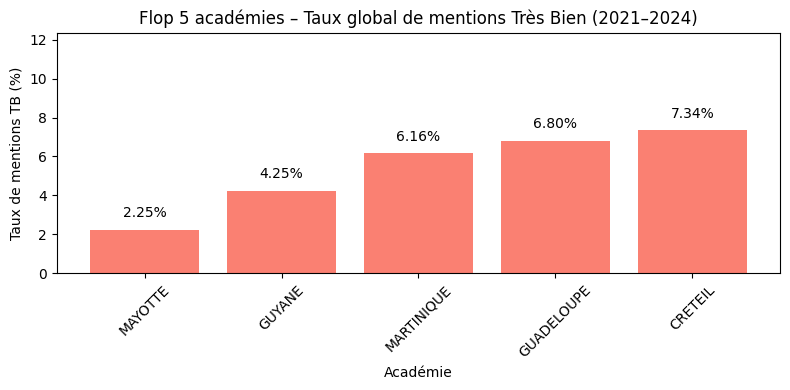

In [ ]:
# Recharger le fichier CSV nouvellement téléversé
file_path = "/content/fr-en-baccalaureat-par-academie.csv"

# Chargement des données
df = pd.read_csv(file_path, sep=";")
df = df.fillna(0)
df.columns = df.columns.str.strip()

# Filtrer les années 2021 à 2024
df = df[(df["Session"] >= 2021) & (df["Session"] <= 2024)]
df["Académie"] = df["Académie"].astype(str).str.strip().str.upper()

# Calcul des mentions TB
df["MentionsTB"] = (
    df["Nombre d'admis avec mention TB avec les félicitations du jury"] +
    df["Nombre d'admis avec mention TB sans les félicitations du jury"]
)

df = df[df["Nombre d'admis totaux"] > 0]

# Agrégation pondérée par académie
global_ratios = df.groupby("Académie")[["MentionsTB", "Nombre d'admis totaux"]].sum()
global_ratios["TauxMentionTB"] = (global_ratios["MentionsTB"] / global_ratios["Nombre d'admis totaux"]) * 100

# Bottom 5 académies
bottom5_final = global_ratios.sort_values("TauxMentionTB", ascending=True).head(5).reset_index()

# Affichage du graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
bars = plt.bar(bottom5_final["Académie"], bottom5_final["TauxMentionTB"], color="salmon")
plt.title("Flop 5 académies – Taux global de mentions Très Bien (2021–2024)")
plt.ylabel("Taux de mentions TB (%)")
plt.xlabel("Académie")
plt.ylim(0, bottom5_final["TauxMentionTB"].max() + 5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**c) Taux de réussite par voie entre 2021 et 2024**

In [ ]:
import pandas as pd

# Chargement des données
df = pd.read_csv("fr-en-baccalaureat-par-academie.csv", sep=";")
df = df.fillna(0)
df.columns = df.columns.str.strip()

# Filtrage 2021–2024
df = df[(df["Session"] >= 2021) & (df["Session"] <= 2024)]
df["Voie"] = df["Voie"].astype(str).str.strip().str.upper()

# Filtrage des lignes valides
df = df[df["Nombre de présents"] > 0]
df = df[df["Nombre d'admis totaux"] > 0]

# Calcul du taux de réussite
df["TauxReussite"] = df["Nombre d'admis totaux"] / df["Nombre de présents"]

# Agrégation pondérée par voie
taux_par_voie = df.groupby("Voie")[["Nombre d'admis totaux", "Nombre de présents"]].sum()
taux_par_voie["TauxReussite"] = (taux_par_voie["Nombre d'admis totaux"] / taux_par_voie["Nombre de présents"]) * 100
taux_par_voie = taux_par_voie[["TauxReussite"]].round(2).sort_values("TauxReussite", ascending=False)

# Affichage du tableau
print("Taux global de réussite moyen par voie (2021–2024) :")
print(taux_par_voie)


Taux global de réussite moyen par voie (2021–2024) :
                   TauxReussite
Voie                           
BAC GENERAL               96.21
BAC TECHNOLOGIQUE         91.06
BAC PROFESSIONNEL         83.89


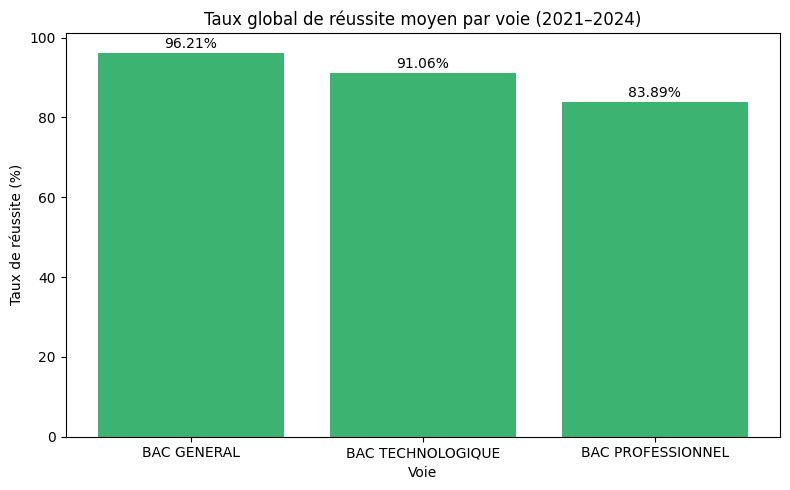

In [ ]:
# Création du graphique de comparaison des taux de réussite moyens par voie
plt.figure(figsize=(8, 5))
bars = plt.bar(taux_par_voie.index, taux_par_voie["TauxReussite"], color="mediumseagreen")
plt.title("Taux global de réussite moyen par voie (2021–2024)")
plt.ylabel("Taux de réussite (%)")
plt.xlabel("Voie")
plt.ylim(0, taux_par_voie["TauxReussite"].max() + 5)

# Affichage des pourcentages sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()




**d) Taux global de réussite par sexe entre 2021 et 2024**

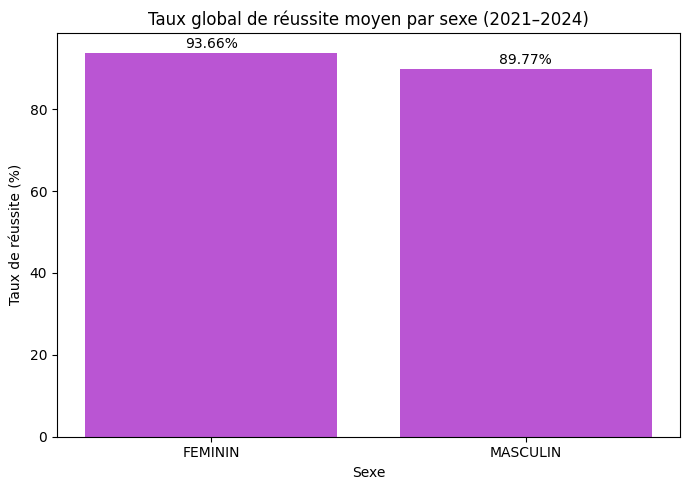

In [ ]:
# Regrouper les synonymes de sexe sous deux catégories : FEMININ et MASCULIN
df["Sexe"] = df["Sexe"].replace({
    "FEMININ": "FEMININ",
    "FILLES": "FEMININ",
    "FILLE": "FEMININ",
    "MASCULIN": "MASCULIN",
    "GARCONS": "MASCULIN",
    "GARÇONS": "MASCULIN",
    "GARCON": "MASCULIN"
})

# Recalcul des taux après regroupement
taux_par_sexe = df.groupby("Sexe")[["Nombre d'admis totaux", "Nombre de présents"]].sum()
taux_par_sexe["TauxReussite"] = (taux_par_sexe["Nombre d'admis totaux"] / taux_par_sexe["Nombre de présents"]) * 100
taux_par_sexe = taux_par_sexe[["TauxReussite"]].round(2).sort_values("TauxReussite", ascending=False)

# Affichage du graphique mis à jour
plt.figure(figsize=(7, 5))
bars = plt.bar(taux_par_sexe.index, taux_par_sexe["TauxReussite"], color="mediumorchid")
plt.title("Taux global de réussite moyen par sexe (2021–2024)")
plt.ylabel("Taux de réussite (%)")
plt.xlabel("Sexe")
plt.ylim(0, taux_par_sexe["TauxReussite"].max() + 5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


**e) Taux Global de mention Très bien par statut du candidat entre 2021 et 2024**

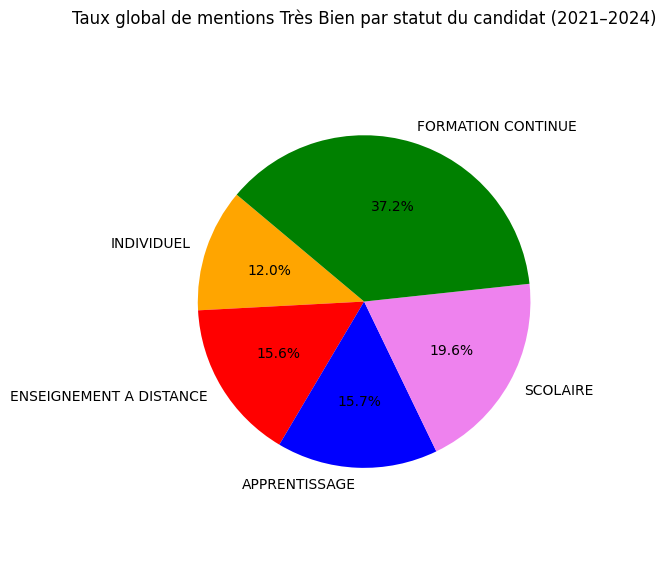

In [ ]:
# Regénérer le diagramme circulaire avec les statuts triés par taux croissant

# Recharger les données si nécessaire
df = pd.read_csv("/content/fr-en-baccalaureat-par-academie.csv", sep=";")
df = df.fillna(0)
df.columns = df.columns.str.strip()

df = df[(df["Session"] >= 2021) & (df["Session"] <= 2024)]
df["Statut du candidat"] = df["Statut du candidat"].astype(str).str.strip().str.upper()
df["MentionsTB"] = (
    df["Nombre d'admis avec mention TB avec les félicitations du jury"] +
    df["Nombre d'admis avec mention TB sans les félicitations du jury"]
)
df = df[df["Nombre d'admis totaux"] > 0]

mentions_tb_par_statut = df.groupby("Statut du candidat")[["MentionsTB", "Nombre d'admis totaux"]].sum()
mentions_tb_par_statut["TauxMentionTB"] = (mentions_tb_par_statut["MentionsTB"] / mentions_tb_par_statut["Nombre d'admis totaux"]) * 100
mentions_tb_par_statut = mentions_tb_par_statut[["TauxMentionTB"]].round(2)

# Tri croissant des taux
mentions_tb_par_statut_sorted = mentions_tb_par_statut.sort_values("TauxMentionTB")

# Couleurs selon statut
couleur_map = {
    "SCOLAIRE": "violet",
    "INDIVIDUEL": "orange",
    "FORMATION CONTINUE": "green",
    "ENSEIGNEMENT A DISTANCE": "red",
    "APPRENTISSAGE": "blue"
}
colors_sorted = [couleur_map.get(statut, "gray") for statut in mentions_tb_par_statut_sorted.index]

# Création du graphique
plt.figure(figsize=(6, 6))
plt.pie(mentions_tb_par_statut_sorted["TauxMentionTB"],
        labels=mentions_tb_par_statut_sorted.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors_sorted)
plt.title("Taux global de mentions Très Bien par statut du candidat (2021–2024)")
plt.axis('equal')
plt.tight_layout()
plt.show()


**f) Classement des Séries selon leur Taux de Réussite Global Moyen**

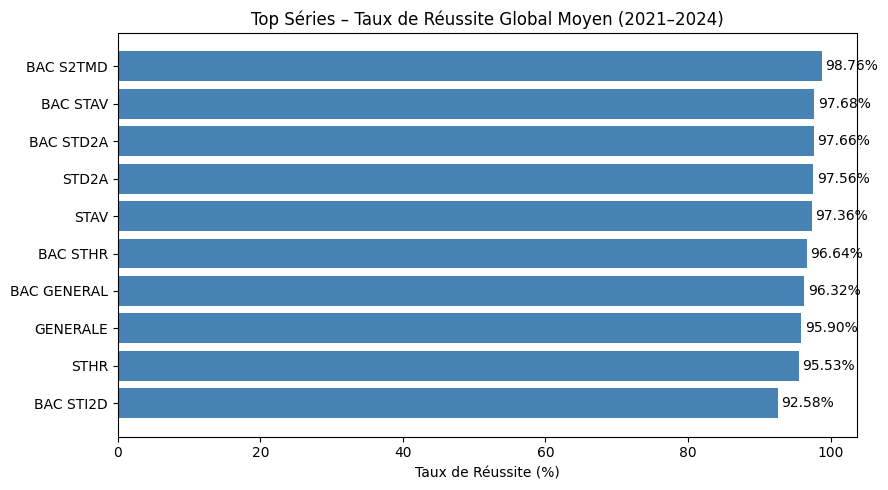

In [ ]:
# Calcul du classement des séries selon leur taux de réussite global moyen entre 2021 et 2024

# Recharger et filtrer les données
df = pd.read_csv("/content/fr-en-baccalaureat-par-academie.csv", sep=";")
df = df.fillna(0)
df.columns = df.columns.str.strip()

df = df[(df["Session"] >= 2021) & (df["Session"] <= 2024)]
df["Série"] = df["Série"].astype(str).str.strip().str.upper()

# Filtrage des lignes exploitables
df = df[df["Nombre de présents"] > 0]
df = df[df["Nombre d'admis totaux"] > 0]

# Agrégation des admis et présents par série
serie_stats = df.groupby("Série")[["Nombre d'admis totaux", "Nombre de présents"]].sum()
serie_stats["TauxReussite"] = (serie_stats["Nombre d'admis totaux"] / serie_stats["Nombre de présents"]) * 100
serie_stats = serie_stats[["TauxReussite"]].round(2).sort_values("TauxReussite", ascending=False)

# Sélection des séries principales si trop nombreuses
top_series = serie_stats.head(10)  # Peut être ajusté selon la lisibilité

# Création du graphique en barres horizontales
plt.figure(figsize=(9, 5))
bars = plt.barh(top_series.index[::-1], top_series["TauxReussite"][::-1], color="steelblue")
plt.xlabel("Taux de Réussite (%)")
plt.title("Top Séries – Taux de Réussite Global Moyen (2021–2024)")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.2f}%", va='center')

plt.tight_layout()
plt.show()


# **6) Application des Algorithmes de Machine Learning**

**a) Préparation du dataset**

In [ ]:
import pandas as pd

# Chargement et nettoyage
df = pd.read_csv("fr-en-baccalaureat-par-academie.csv", sep=";")
df = df.fillna(0)
df.columns = df.columns.str.strip()

# Filtrage des années pertinentes
df = df[(df["Session"] >= 2021) & (df["Session"] <= 2024)]

# Création de la variable cible binaire MentionTB
df["MentionsTB"] = (
    df["Nombre d'admis avec mention TB avec les félicitations du jury"] +
    df["Nombre d'admis avec mention TB sans les félicitations du jury"]
)
df = df[df["Nombre d'admis totaux"] > 0]
df["TauxMentionTB"] = df["MentionsTB"] / df["Nombre d'admis totaux"]
df["MentionTB"] = (df["TauxMentionTB"] > 0.2).astype(int)


**b) Sélection des variables explicatives**

In [ ]:
df_model = df[["Voie", "Nombre de présents", "Nombre d'admis totaux", "MentionTB"]]

# Encodage de la variable catégorielle
df_model = pd.get_dummies(df_model, columns=["Voie"])


**c) Séparation des données et entraînement du modèle**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Séparation X / y
X = df_model.drop("MentionTB", axis=1)
y = df_model["MentionTB"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")


Accuracy : 0.9111
